### $\color{indianred}{\text{ПРВА ВЈЕЖБА ИЗ АСТРОСТАТИСТИКЕ, датум:}} $

### Теоријски увод

<hr style="border: none; height: 2px; background-color: red; opacity: 0.5;" />


$x$ је скаларна величина која се мјери \( N \) пута да би се формирао скуп података.

- $x_i$ је појединачно мјерење за $i = 1, \dots, N$.  
- $\{x_i\}$ означава скуп свих $N$ мјерења која чине скуп података.  

Подаци могу бити реални бројеви, дискретне ознаке (нпр. стрингови), или чак „недостајуће вриједности” (тад  

користимо $NaN$).  



$\blacksquare$ Генерално, покушавамо да **процијенимо** $h(x)$, **стварну** дистрибуцију вјероватноће из које  

су узети подаци $\{x_i\}$ случајно одабрани.  

- $h(x)$ представља **функцију густине вјероватноће** (енгл. *Probability Density Function* - PDF),  

    при чему је $h(x)dx$ дефинисана као вјероватноћа да случајна промјенљива $x$ поприми вриједност у интервалу  

    $[x, x + dx]$. Ова дистрибуција може имати различите нивое - од класичне расподјеле физичких параметара  

    (нпр. дистрибуције црвеног помака космичких извора) до дистрибуције неодређености мјерења која уводи додатну  

    стохастичку компоненту у посматране вриједности.  

- **Интеграл** од $h(x)$ одређује **кумулативну функцију дистрибуције** (енгл. *Cumulative Distribution Function* - CDF),  

    дефинисану као:  
      $$
      H(x) = \int_{-\infty}^{x} h(x')dx'.
      $$  

- Инверзна функција од $H(x)$ је тзв. **квантилна функција** и омогућава одређивање вриједности $x$ испод које  

  се налази одређени проценат укупне расподјеле (нпр. $90\%$).  

- Иако $h(x)$ представља „идеализовану” дистрибуцију података (познату и као **популациона** функција густине),  

    експериментално доступни подаци омогућавају само апроксимацију путем **емпиријске** функције густине  

    вјероватноће, означене са $f(x)$. Дакле, $f(x)$ може бити схваћена као **модел** за $h(x)$. У теоријском  

    лимиту бесконачне количине података важи $f(x) \to h(x)$, али у реалним условима ефекти несигурности мјерења  

    и ограничене величине узорка узрокују одступања. Додатно, емпиријска кумулативна дистрибуција означава  

    се са $F(x)$.  

- У ситуацијама када настојимо да конструишемо **физички модел** функције $h(x)$, говоримо о **параметарској**  

    методологији. У том случају, одабир математичке форме модела омогућава генерисање нових синтетичких  

    података који би требало да репродукују основне карактеристике посматраних величина. Насупрот томе, уколико  

    не  постављамо експлицитне претпоставке о форми функције $h(x)$, већ је емпиријски апроксимирамо из  

    података, процес се квалификује као **непараметарски** – циљ је дескриптивна карактеризација података  

    без експлицитног  моделовања феномена који их генерише.  

$\blacksquare$ Визуелизација (тј. фундаментално разумијевање) *PDF-а* представља нелинеаран проблем!  

Разматрајмо илустративни примјер. У оквиру овог експеримента, прво ћемо дефинисати почетну дистрибуцију $h(x)$,  

затим генерисати узорак случајних података $\{x_i\}$, а потом покушати да апроксимирамо емпиријску расподјелу  

користећи и параметарске и непараметарске методе процјене функције густине вјероватноће $f(x)$.

<hr style="border: none; height: 2px; background-color: red; opacity: 0.5;" />

Прелазимо на код и увозимо потребне библиотеке.

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.neighbors import KernelDensity
from astropy.visualization import hist
from sklearn.mixture import GaussianMixture

Испод ћемо генерисати случајне податке, комбинацијом пет Кошијевих расподјела са различитим параметрима.

Укратко, Кошијева расподјела је континуална расподјела вјероватноће. Њена функције густине вјероватноће је:

$$
f(x,\, \gamma) = \frac{1}{\pi \gamma} \cdot \frac{1}{1 + \left( \frac{x - x_0}{\gamma} \right)^2},
$$

гдје су:
- $x_0$ - параметар локације (медијана),
- $\gamma$ - параметар скале (половина ширине на пола максималне густине),
- $x$ - случајна промјењива.

Неке од главних особина су што нема очекивану вриједност, ни варијансу. Има "дуге репове", што значи да се

често јављају екстремне вриједности. Користи се као примјер "проблематичне" расподјеле у статистици.

<hr style="border: none; height: 2px; background-color: red; opacity: 0.5;" />

Враћамо се на примјер. Правимо листе тројки ($\mu,\,\gamma,\,f$), гдје су:

$\mu$ - средња вриједност (*mean*) Кошијеве расподјеле;

$\gamma$ - ширина (*scale parameter*) Кошијеве расподјеле;

$f$ - тзв. пондер или тежински фактор, који одређује допринос сваке компоненте у укупној расподјели.

Дакле, ми сад генеришемо податке, али их у реалности добијамо мјерењем.

In [34]:
random_state = np.random.RandomState(seed=0) # генератор случајних бројева (важи репродуктивност)
N = 2000 # укупан број генерисаних података

mu_gamma_f = [(5, 1.0, 0.1), # листа од пет тројки
              (7, 0.5, 0.5),
              (9, 0.1, 0.1),
              (12, 0.5, 0.2),
              (14, 1.0, 0.1)]

hx = lambda x: sum([f * stats.cauchy(mu, gamma).pdf(x) # функција густине вјероватноће
                          for (mu, gamma, f) in mu_gamma_f])

# генерисање случајних промјењивих
x = np.concatenate([stats.cauchy(mu, gamma).rvs(int(f * N), random_state=random_state)
                    for (mu, gamma, f) in mu_gamma_f])

random_state.shuffle(x) # мијешање података

x = x[x > -15]
x = x[x < 25]

In [35]:
print(len(x))
print(x[:10])

1965
[ 8.95259664  6.94253336 11.85750297  7.96736763  8.33979377  9.10403052
  9.0348829   9.0006615  12.0682028  12.43803661]


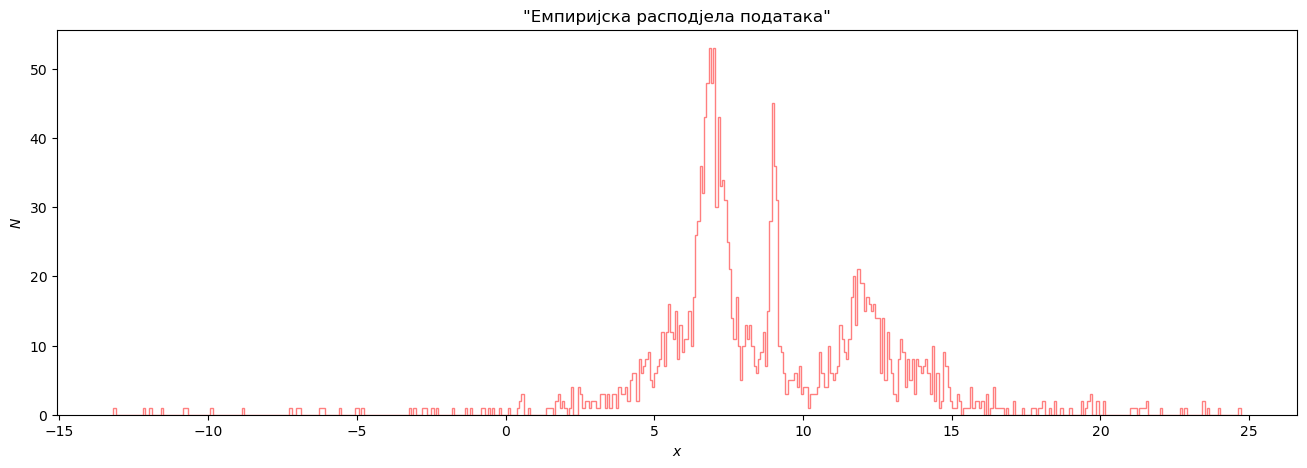

In [36]:
plt.figure(figsize=(16,5))
plt.hist(x, bins=500, color='red', histtype='step', alpha=0.5)
plt.xlabel(r'$x$')
plt.ylabel(r'$N$')
plt.title('"Емпиријска расподјела података"')
plt.show()

Настављамо уз мало комплекснији примјер.

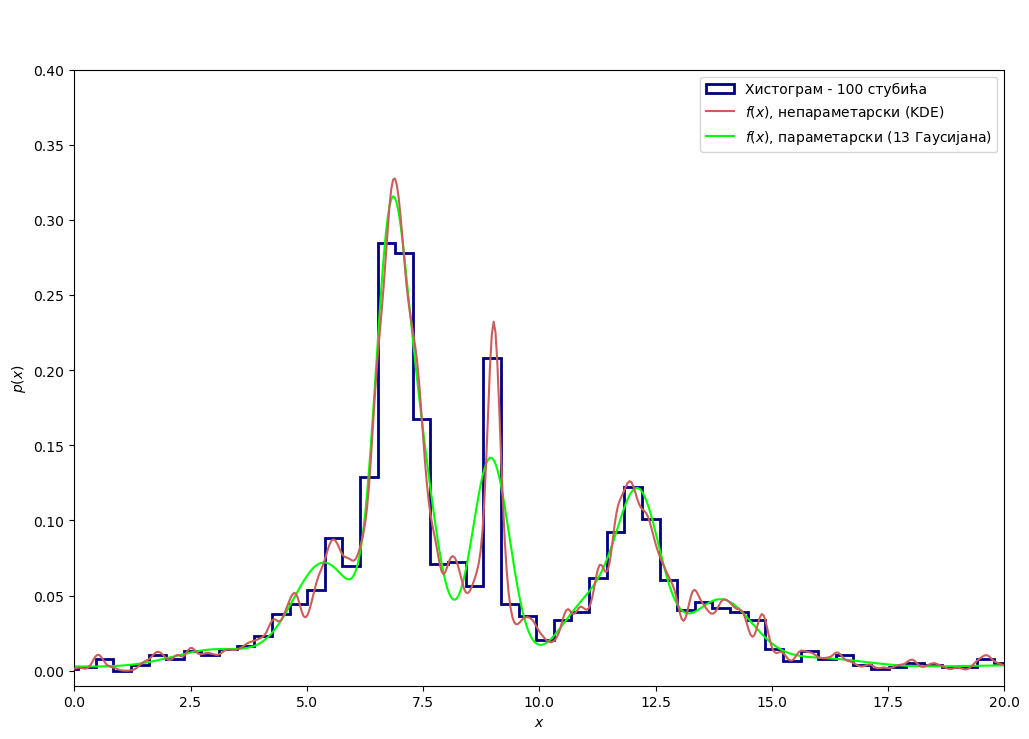

In [57]:
plt.figure(figsize=(12,8))
xgrid = np.linspace(-10, 30, 1000) # генерисање мреже тачака за цртање густине

# Права расподјела - у реалности, имамо само узорке података
if False:
    plt.plot(xgrid, hx(xgrid), ':', color='black', zorder=3,
            label='$h(x)$, Generating Distribution')

# Опет правимо хистограм
if True:
    plt.hist(x, density=True, color='navy', bins=100, histtype='step', lw=2, label='Хистограм - 100 стубића')

# Непараметарска метода процјене функције густине - Kernel Density Estimation (KDE)
if True:
    kde = KernelDensity(bandwidth=0.1, kernel='gaussian') # Гаусов кернел
    kde.fit(x[:, None]) # додавање података
    dens_kde = np.exp(kde.score_samples(xgrid[:, None])) # рачунање вриједности густине
    plt.plot(xgrid, dens_kde, '-', color='indianred', zorder=3, # KDE процијењена функција
            label='$f(x)$, непараметарски (KDE)')

# Параметарска метода која апроксимира расподјелу помоћу мјешавине Гаусијана (Gaussian Mixture Model)
if True:
    n_components = 13
    gmm = GaussianMixture(n_components=n_components).fit(x.reshape(-1, 1)) # креирање модела
    logprob = gmm.score_samples(xgrid.reshape(-1, 1)) # рачунање log-likelihood
    fx = lambda j : np.exp(gmm.score_samples(j.reshape(-1, 1))) # конверзија у праве вјероватноће
    plt.plot(xgrid, fx(np.array(xgrid)), '-', color='lime', # параметарски процијењена функција
            label=f'$f(x)$, параметарски ({n_components} Гаусијана)')

plt.text(0.02, 0.85, '%i података' % N, ha='left', va='top',
            transform=ax.transAxes)

plt.ylabel('$p(x)$')
plt.legend(loc='upper right')
plt.xlabel('$x$')
plt.xlim(0, 20)
plt.ylim(-0.01, 0.4001)
plt.show()

In [55]:
print('h(x) - права расподјела: ', hx(15)) 
print('f(x) за непараметарски модел: ', np.exp(kde.score_samples(np.atleast_2d(15)))) 
print('f(x) за параметарски модел: ', fx(np.array([15]))) 

h(x) - права расподјела:  0.020998795298206318
f(x) за непараметарски модел:  [0.01587321]
f(x) за параметарски модел:  [0.01796262]
